In [1]:
using Pkg
if isfile("../Project.toml") && isfile("../Manifest.toml")
    Pkg.activate("..");
end

function printer(x::Any, verbose="")
    if verbose != ""
        println(verbose)
    end
    show(stdout, "text/plain", x)
    println("")
end

 Activating environment at `~/Programming/julia/notebook/JuliaProbo/Project.toml`


printer (generic function with 2 methods)

In [2]:
using CSV, DataFrames, Plots, StatsPlots, Statistics, StatsBase
gr()

Plots.GRBackend()

## lidar_200

In [3]:
data = DataFrame(CSV.File("../sensor_data/sensor_data_200.txt"; header=["date", "time", "ir", "lidar"], types=[Float64, Float64, Float64, Float64]))
printer(data.lidar[1:5])

5-element Array{Float64,1}:
 214.0
 211.0
 199.0
 208.0
 212.0


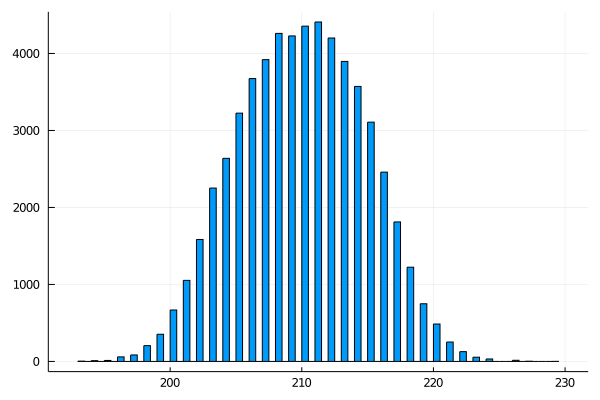

In [4]:
histogram(data.lidar, legend=nothing)

In [5]:
mean1 = sum(data.lidar) / size(data.lidar)[1]
mean2 = mean!([1.0], data.lidar)
printer(mean1, "mean1")
printer(mean2, "mean2")

mean1
209.73713297619855
mean2
1-element Array{Float64,1}:
 209.73713297619855


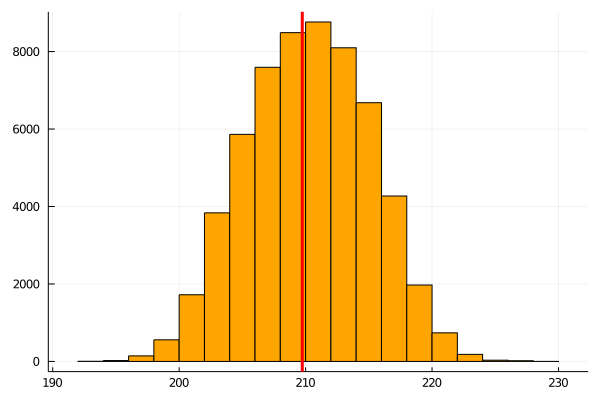

In [6]:
histogram(data.lidar, bins=:sturges, label=nothing, color="orange")
vline!([mean1], label=nothing, lw=3, color="red")

In [7]:
lidar = data.lidar;
lidar_mean = mean!([0.], lidar)[1];
sample_var_lidar = var(lidar, corrected=false);
unbiased_var_lidar = var(lidar, corrected=true);
printer(sample_var_lidar, "sample_var_lidar")
printer(unbiased_var_lidar, "unbiased_var_lidar")

sample_var_lidar
23.407709770274206
unbiased_var_lidar
23.40810659855451


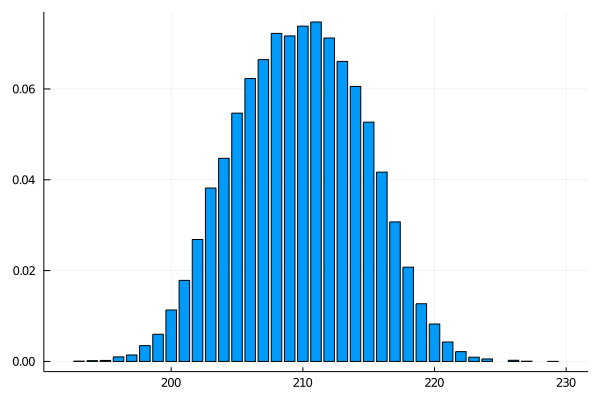

In [8]:
lidar_int = map( x -> Int(x), lidar);
lidar_countmap = countmap(lidar_int)
lidar_val_prob = [Float64[], Float64[], Float64[]]
for (val, freq) in lidar_countmap
    push!(lidar_val_prob[1], val * 1.0);
    push!(lidar_val_prob[2], freq * 1.0);
end
lidar_val_prob[3] = lidar_val_prob[2] / sum(lidar_val_prob[2]);
plot(lidar_val_prob[1], lidar_val_prob[3], seriestype=:bar, legend=nothing)

1-element Array{Any,1}:
 [212.0, 4201.0]


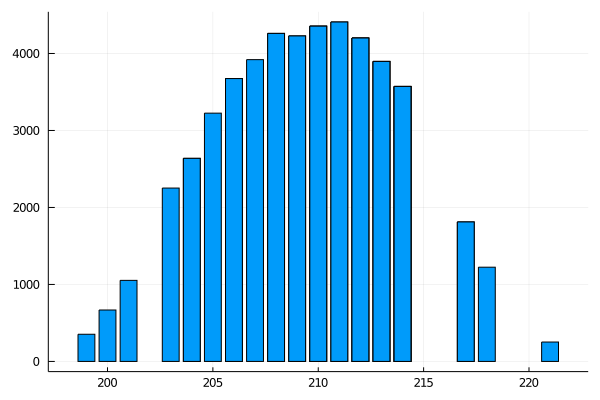

In [9]:
function drawing(lidar_val_freq_tuple, lidar_val_prob)
    return sample(lidar_val_freq_tuple, Weights(lidar_val_prob[3]), 1)
end
lidar_val_prob_tuple = []
len = size(lidar_val_prob[1])[1]
for i in 1:len
    push!(lidar_val_prob_tuple, [lidar_val_prob[1][i], lidar_val_prob[2][i]])
end
samples = [drawing(lidar_val_prob_tuple, lidar_val_prob) for i in 1:len]
a = samples[1]
printer(a)
samples_val = [samples[i][1][1] for i in 1:len]
samples_freq = [samples[i][1][2] for i in 1:len]
plot(samples_val, samples_freq, seriestype=:bar, legend=nothing)

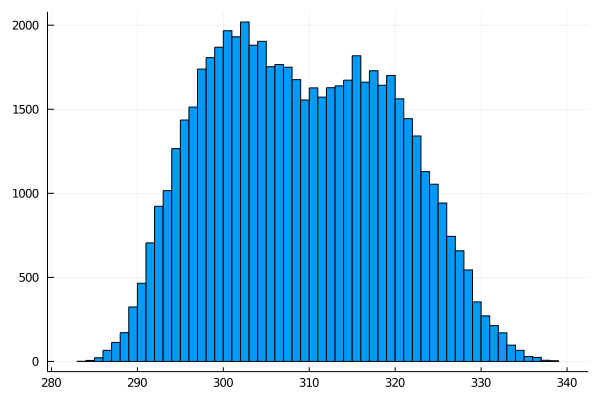

In [10]:
histogram(data.ir, legend=nothing)

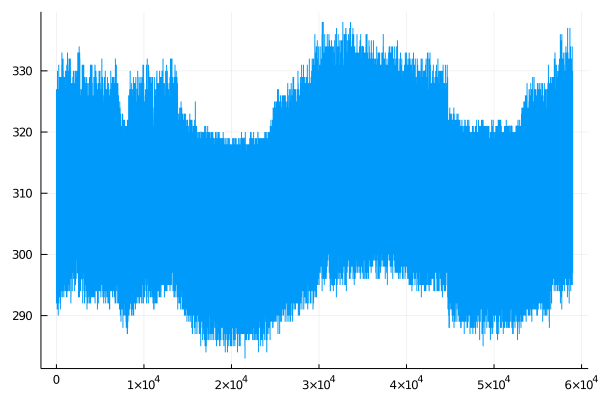

In [11]:
plot(data.ir, legend=nothing)

## lidar_600